In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Working with MNIST Fashion Dataset.
dataSet = keras.datasets.fashion_mnist

# Preparing train and test packages.
(trainImg, trainLbl),(testImg, testLbl) = dataSet.load_data()

In [3]:
# Seeing the shape of datasets
trainImg.shape

(60000, 28, 28)

In [4]:
# Having the types of clothes 
typeClothes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

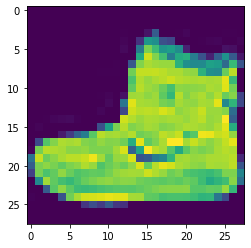

In [5]:
# seeing test images.
plt.figure()
plt.imshow(trainImg[0])
plt.show()

In [6]:
# Preprocess the data

# Pixel range for black&white is from 0(white) to 255(black).
# Applying unit interval, [0,1]

trainImg = trainImg / 255
testImg = testImg / 255

In [7]:
# Building a Sequantial Model where hidden layer is densely conncected

# modelBuild function.

def modelBuild(shapeInput = (28, 28),numberOutput=10, activationInner = 'relu', activationOutput='softmax'):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape = shapeInput),                         # Input layer
        keras.layers.Dense(128, activation = activationInner),                  # Hidden layer
        keras.layers.Dense(numberOutput, activation = activationOutput)])   # Output layer
    return model

    # softmax: probability dist. to ensure output probabilities sum up 1.

    # Common activation functions :
    #     - Relu (Rectified Linear Unit)
    #     - Tanh (Hyperbolic Tangent)
    #     - Sigmoid

In [8]:
# Compiling the model.
model1 = modelBuild()
model1.compile(optimizer = 'adam',
               loss = "sparse_categorical_crossentropy",
               metrics = ['accuracy'])

In [9]:
# Training the Model

model1.fit(trainImg, trainLbl, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5007 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3746 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3353 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3108 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2933 - accuracy: 0.8926
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2781 - accuracy: 0.8977
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2656 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2563 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2447 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.236

In [13]:
# Training 2

model1.fit(trainImg, trainLbl, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2306 - accuracy: 0.9137
Epoch 2/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2231 - accuracy: 0.9168
Epoch 3/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2159 - accuracy: 0.9193
Epoch 4/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2093 - accuracy: 0.9216
Epoch 5/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2032 - accuracy: 0.9236
Epoch 6/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1978 - accuracy: 0.9254
Epoch 7/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1936 - accuracy: 0.9273


In [10]:
# Evaluation of the model

loss, accuracy = model1.evaluate(testImg, testLbl, verbose = 1)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.3379 - accuracy: 0.8850
0.8849999904632568


In [11]:
# Predictions

predictions = model1.predict(testImg)
print(predictions)
print('\n################################################################\n')
print(predictions[0])

313/313 [==============================] - 0s 1ms/step
[[1.66640834e-08 2.83773671e-10 1.33221156e-10 ... 6.09695166e-03
  1.11554066e-07 9.84970868e-01]
 [1.24194185e-05 5.09399923e-17 9.99837041e-01 ... 6.15776699e-18
  3.07518832e-12 3.47537862e-12]
 [1.35669538e-07 9.99999762e-01 3.35074308e-12 ... 4.28225612e-28
  2.41519500e-12 1.13153086e-18]
 ...
 [9.90609478e-05 6.17773957e-11 4.96601160e-06 ... 5.68791195e-11
  9.99844432e-01 2.41337397e-12]
 [6.51772396e-08 9.99992728e-01 8.99861019e-10 ... 1.35450958e-17
  8.17042345e-09 3.43793327e-09]
 [4.71061649e-04 3.18645789e-07 3.51347771e-05 ... 4.98768548e-03
  3.08609102e-04 5.87798349e-05]]

################################################################

[1.66640834e-08 2.83773671e-10 1.33221156e-10 2.58359870e-12
 4.60087690e-10 8.93202797e-03 1.52040414e-09 6.09695166e-03
 1.11554066e-07 9.84970868e-01]


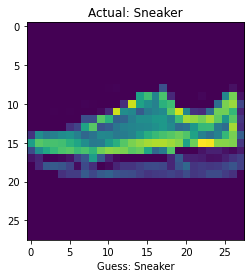

In [37]:
# Checking the output
i = 9
guess = typeClothes[np.argmax(predictions[i])]

plt.figure()
plt.imshow(testImg[i])
plt.title("Actual: " + typeClothes[testLbl[i]])
plt.xlabel("Guess: " + guess)
plt.show()